In [14]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
#import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [47]:
root_path = '/home/mingtao.huang/'
dataDir=root_path + 'dataset/coco/'
dataType='val2017'
img_path=dataDir+dataType+'/'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)

In [10]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


In [89]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format('  '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person  bicycle  car  motorcycle  airplane  bus  train  truck  boat  traffic light  fire hydrant  stop sign  parking meter  bench  bird  cat  dog  horse  sheep  cow  elephant  bear  zebra  giraffe  backpack  umbrella  handbag  tie  suitcase  frisbee  skis  snowboard  sports ball  kite  baseball bat  baseball glove  skateboard  surfboard  tennis racket  bottle  wine glass  cup  fork  knife  spoon  bowl  banana  apple  sandwich  orange  broccoli  carrot  hot dog  pizza  donut  cake  chair  couch  potted plant  bed  dining table  toilet  tv  laptop  mouse  remote  keyboard  cell phone  microwave  oven  toaster  sink  refrigerator  book  clock  vase  scissors  teddy bear  hair drier  toothbrush

COCO supercategories: 
sports animal electronic vehicle food outdoor person kitchen appliance accessory indoor furniture


In [86]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog'])#,'skateboard']);
imgIds = coco.getImgIds(catIds=catIds);
#imgIds = coco.getImgIds(imgIds = [324158])

#imgIds = imgIds[10]
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

(-0.5, 639.5, 479.5, -0.5)

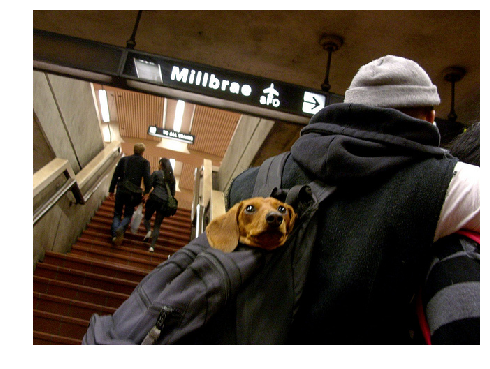

In [87]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = cv2.imread(img_path + img['file_name'])[:,:,[2,1,0]]
plt.imshow(I); plt.axis('off')

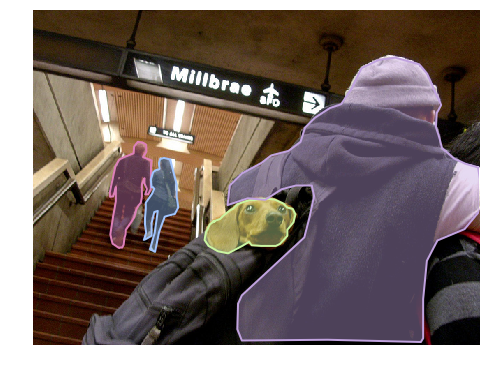

In [88]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [60]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


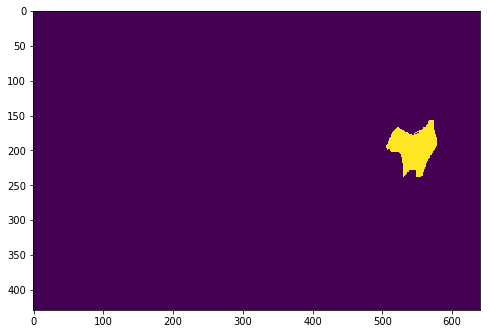

In [79]:
plt.imshow(coco.annToMask(anns[0]))

In [91]:
len("person  bicycle  car  motorcycle  airplane  bus  train  truck  boat  traffic light  fire hydrant  stop sign  parking meter  bench  bird  cat  dog  horse  sheep  cow  elephant  bear  zebra  giraffe  backpack  umbrella  handbag  tie  suitcase  frisbee  skis  snowboard  sports ball  kite  baseball bat  baseball glove  skateboard  surfboard  tennis racket  bottle  wine glass  cup  fork  knife  spoon  bowl  banana  apple  sandwich  orange  broccoli  carrot  hot dog  pizza  donut  cake  chair  couch  potted plant  bed  dining table  toilet  tv  laptop  mouse  remote  keyboard  cell phone  microwave  oven  toaster  sink  refrigerator  book  clock  vase  scissors  teddy bear  hair drier  toothbrush".split('  '))

80